# CONTROLLABILITY OF BIOLOGICAL SYSTEMS

This notebook explores the construction and interpretation of transfer functions for more complex networks.

# Preliminaries

In [1]:
!pip -q install controlSBML>=0.2.10
import controlSBML as ctl
import control
from controlSBML.util import makeSimulationTimes

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tellurium as te
import sympy
print("controlSBML version: " + ctl.__version__)

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires tornado~=5.1.0; python_version >= "3.0", but you have tornado 6.1 which is incompatible.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.
controlSBML version: 0.2.21


# Transfer Functions in the ``control`` Package

Suppose our transfer function is $G(s) = \frac{1}{s} \frac{k_1}{k_2 + s}$.

The ``control`` packages provides a way to construct transfer functions that are a ratio of
polynomials in $s$.

In [2]:
# Representation of G(s)
k1 = 1
k2 = 2
numerator = [k1]  # k1 is s**0
denominator = [1, k2, 0]
tf = control.TransferFunction(numerator, denominator)

## Representing Polynomials

A polynomial in $s$ is represented as a ``python`` list.
For example, $s + k_2$ is the polynomial $(1)s^1 + (k_2) s^0$.
It is represented by the list ``[1, k2]``, where ``k2`` is the floating point value of $k_2$.
The interpretation is that the last element of the list is the coefficient of $s^0$;
elements that preceed the last element represent successive powers of $s$.

**Question: What is the list that represents the polynomial $3 s^3 + 2s$?**

## Creating Transfer Functions

To create a transfer function, you provide the numerator and denominator polynomial.
Consider the construction of the transfer function for
$G(s) = \frac{1}{s} \frac{k_1}{k_2 + s} = \frac{k_1}{s^2 + k_2 s}$.

**Question: What are the poles of $G(s)$?**

In [3]:
k1 = 1
k2 = 2
tf = control.TransferFunction([k1], [1, k2, 0])
tf

TransferFunction(array([1]), array([1, 2, 0]))

In [4]:
tf.pole()

array([-2.+0.j,  0.+0.j])

In [5]:
tf.dcgain()

inf

In [6]:
# Transfer function for k1/(k2 +s)
new_tf = control.TransferFunction([k1], [1, k2])
new_tf

TransferFunction(array([1]), array([1, 2]))

In [7]:
new_tf.pole()

array([-2.+0.j])

In [8]:
new_tf.dcgain()

0.5

## Using ``TransferFunction`` objects

There are several ways to use transfer function objects.
You can find the poles, calculate DC gain, and simulate impulse and step responses.

### Poles of a TransferFunction

In [9]:
# The poles should be 0, -k2 = -2
tf.pole()

array([-2.+0.j,  0.+0.j])

### DC Gain of a TransferFunction

In [10]:
tf.dcgain()

inf

**Question: Why is DC Gain = $\infty$?**

### Impulse Response

In [11]:
# You can use controlSBML to make a sequence of simulation times. By default it's in increments
# of 0.1 from 0 to 5.
TIMES = ctl.makeSimulationTimes(end_time=10, points_per_time=5)
TIMES

array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  1.8,  2. ,
        2.2,  2.4,  2.6,  2.8,  3. ,  3.2,  3.4,  3.6,  3.8,  4. ,  4.2,
        4.4,  4.6,  4.8,  5. ,  5.2,  5.4,  5.6,  5.8,  6. ,  6.2,  6.4,
        6.6,  6.8,  7. ,  7.2,  7.4,  7.6,  7.8,  8. ,  8.2,  8.4,  8.6,
        8.8,  9. ,  9.2,  9.4,  9.6,  9.8, 10. ])

In [12]:
tf

TransferFunction(array([1]), array([1, 2, 0]))

In [13]:
result = control.impulse_response(tf, T=TIMES)

In [14]:
result.t

array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  1.8,  2. ,
        2.2,  2.4,  2.6,  2.8,  3. ,  3.2,  3.4,  3.6,  3.8,  4. ,  4.2,
        4.4,  4.6,  4.8,  5. ,  5.2,  5.4,  5.6,  5.8,  6. ,  6.2,  6.4,
        6.6,  6.8,  7. ,  7.2,  7.4,  7.6,  7.8,  8. ,  8.2,  8.4,  8.6,
        8.8,  9. ,  9.2,  9.4,  9.6,  9.8, 10. ])

``result`` is complicated objects with many properties.
* ``result.outputs`` - ``result.outputs[n]`` is a time series for the output ``n``
* ``result.t`` - times simulated (which should be the same as ``TIMES``)

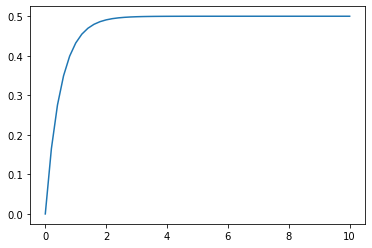

In [15]:
# Since we're doing single input single output (SISO) systems,
# you can simplify matters by just flattening result.t, result.outputs
plt.plot(result.t.flatten(), result.outputs.flatten())

**Question: The above impulse response converges to 0.5. How is this predicted by $G(s)$?**

Hint: Recall that for an impulse input, $y(\infty) = lim_{s \rightarrow 0} s G(s)$.

### Step Response

**Question: Does $G(s)$ converge for a step response? If so, to what value?**

Hint: Recall that for a step input, $y(\infty) = lim_{s \rightarrow 0}  G(s)$.

Consider $H(s) = \frac{k_1}{s + k_2}$.

**Question: Construct ``control.TransferFunction`` object for $H(s)$. if $k_2 = 3$.**

**REMOVE**

In [16]:
k2 = 3
tf = control.TransferFunction([k1], [1, k2])
tf

TransferFunction(array([1]), array([1, 3]))

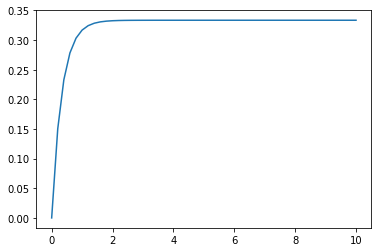

In [17]:
result = control.step_response(tf, T=TIMES)
plt.plot(result.t.flatten(), result.outputs.flatten())

**Question: The above step response converges to 0.33. How is this predicted by $H(s)$?**

# State Space Representation in the ``control`` Package

Consider the reaction network

    S1 -> S2 + S3; k1*S1
    S2 -> S3;      k2*S2
    S3 ->   ;  k3*S3
    
    k1 = 0.5
    k2 = 1.5
    k3 = 0.75


**Question: What are the system equations for this network?**

\begin{eqnarray}
\dot{S}_1 & = & - k_1 S_1 \\
\dot{S}_2 & = & k_1 S_1 - k_2 S_2 \\
\dot{S}_3 & = & k_1 S_1 + k_2 S_2 - k_3 S_3 \\
\end{eqnarray}

A state space representation of a SISO system is:

\begin{eqnarray}
\dot{\bf x} & = & {\bf A} {\bf x} + {\bf b} u \\
y & = & {\bf c} {\bf x}
\end{eqnarray}

where
* ${\bf x}$ is a vector of state
* $u$ is the scalar input
* $y$ is the scalar output
* ${\bf A}$, a matrix of constants, describes the relationships between state variables
* ${\bf b}$ is a column vector that indicates how the input affects each state
* ${\bf c}$ is a row vector that specifies how each state contributes to the output

### Creating State Space Objects for SISO Systems

\begin{eqnarray}
\dot{S}_1 & = & - k_1 S_1 \\
\dot{S}_2 & = & k_1 S_1 - k_2 S_2 \\
\dot{S}_3 & = & k_1 S_1 + k_2 S_2 - k_3 S_3 \\
\end{eqnarray}

The ${\bf A}$ matrix is an alternative representation of the state equations.
The rows are the equations.
In our example, row 2 is the equation for $\dot{S}_2$.
(Of course, the python index for this row is 1.)
The columns, represent the state variable.
So, column 3 is for $S_3$.

That is
$\dot{\bf x} = 
\begin{bmatrix}
-k_1 & 0 & 0\\
k_1 & -k_2 & 0  \\
k_1 & k_2 & -k_3
\end{bmatrix}
{\bf x} + {\bf b}u$.

**Question: If the input is $S_1$, what is ${\bf b}$?**

**REMOVE**

${\bf b} =
\begin{bmatrix}
1 \\
0 \\
0 \\
\end{bmatrix}.
$

### Creating ``control.StateSpace`` objects

Consider a system with $S_1$ as input and $S_3$ as output.

In [18]:
k1 = 0.5
k2 = 1.5
k3 = 0.75

A = np.array( [ [-k1, 0, 0],
    [k1, -k2, 0],
     [k1, k2, -k3]])
B = [1, 0, 0]
C = [0, 0, 1]
state_space = control.StateSpace(A, B, C, 0)
state_space.A, state_space.B, state_space.C

(array([[-0.5 ,  0.  ,  0.  ],
        [ 0.5 , -1.5 ,  0.  ],
        [ 0.5 ,  1.5 , -0.75]]), array([[1.],
        [0.],
        [0.]]), array([[0., 0., 1.]]))

### Using State Space Objects

* simulation: ``control.input_output_response``
* convert to transfer function (since this is easier to deriving the transfer function: ``control.ss2tf``

In [19]:
tf = control.ss2tf(state_space)
tf

TransferFunction(array([-8.8817842e-16,  5.0000000e-01,  1.5000000e+00]), array([1.    , 2.75  , 2.25  , 0.5625]))

In [20]:
tf.dcgain()

2.6666666666666616

# mTOR Signaling

<img src="https://media.springernature.com/full/springer-static/image/art%3A10.1038%2Fs41598-017-18400-z/MediaObjects/41598_2017_18400_Fig1_HTML.jpg"
     alt="Markdown Monster icon"
     style="float: left; margin-right: 10px;" />

## Constructing State Space Objects from Tellurium

In [21]:
rr = te.loadSBMLModel("https://www.ebi.ac.uk/biomodels/model/download/BIOMD0000000823.2?filename=Varusai2018.xml")
rr.getFullJacobian()

                          IR,        pIR, IRS,      pIRS,  iIRS, Akt,       pAkt, mTORC1,    pmTORC1, mTORC2,   pmTORC2, imTORC2, mTORC1_DEPTOR, mTORC2_DEPTOR, DEPTOR,   pDEPTOR
IR            [[ -0.00451843,  0.0285714,   0,         0,     0,   0,          0,      0,          0,      0,         0,       0,             0,             0,      0,         0],
pIR            [  0.00451843, -0.0285714,   0,         0,     0,   0,          0,      0,          0,      0,         0,       0,             0,             0,      0,         0],
IRS            [           0, -0.0666667,   0,      0.02,  0.02,   0,          0,      0, -0.0666667,      0,         0,       0,             0,             0,      0,         0],
pIRS           [           0,  0.0666667,   0,     -0.02,     0,   0,          0,      0,          0,      0,         0,       0,             0,             0,      0,         0],
iIRS           [           0,          0,   0,         0, -0.02,   0,          0,      0,  0.0666667, 

There's a some work to get the indices right to construct ${\bf b}$, ${\bf c}$,
and to get the species names.

## Constructing ``control`` objects using ``controlSBML``

In [22]:
ctlsb = ctl.ControlSBML("https://www.ebi.ac.uk/biomodels/model/download/BIOMD0000000823.2?filename=Varusai2018.xml",
                       input_names=["pAkt"], output_names=["mTORC1_DEPTOR"])
mtor_nl = ctlsb.makeNonlinearIOSystem("mtor")
mtor_ss = ctlsb.makeStateSpace()
MTOR_TF = ctlsb.makeTransferFunction(time=1, atol=1e-5)

In [23]:
MTOR_TF

TransferFunction(array([ 1.77635684e-15, -3.47222222e-02, -1.78382750e-01, -1.76171019e-01,
       -5.26393026e-02, -3.23678364e-03, -7.17996155e-05, -5.34774515e-07,
       -3.16697447e-20,  2.20355124e-35, -6.32840705e-52, -1.62063189e-69,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00]), array([ 1.00000000e+00,  1.15350860e+01,  4.03050922e+01,  4.61455538e+01,
        2.21920311e+01,  4.38036571e+00,  2.46627511e-01,  5.28265884e-03,
        3.86394741e-05,  3.01872139e-21, -2.70594761e-37, -1.48663417e-55,
       -6.80811420e-72,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00]))

In [24]:
MTOR_TF.dcgain()

nan

In [25]:
MTOR_TF.pole()

/usr/local/lib/python3.7/dist-packages/scipy/signal/filter_design.py:1632: BadCoefficients:

Badly conditioned filter coefficients (numerator): the results may be meaningless



array([-5.99999615e+00+0.j, -3.96034236e+00+0.j, -5.71428571e-01+0.j,
       -5.01657639e-01+0.j, -4.28571428e-01+0.j, -3.30898590e-02+0.j,
       -1.99999973e-02+0.j, -2.00000027e-02+0.j, -1.31311647e-16+0.j,
        5.39998458e-17+0.j, -4.07232566e-19+0.j, -4.06289599e-19+0.j,
        0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j])

## Controllability Analysis

In [26]:
#MTOR_TF.dcgain()

Suppose that we want to control the complex ``mTORC1_DEPTOR``.
What inputs should we control?
We start by controlling the amount of insullin.